In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
from gwpy.timeseries import TimeSeries

### Load data

In [7]:

def train_file_path_from_id(event_id: int) -> str:
    return f'train/{event_id[0]}/{event_id[1]}/{event_id[2]}/{event_id}.npy'

train_labels = pd.read_csv('training_labels.csv')

train_id_path_map = {
    event_id: train_file_path_from_id(event_id=event_id)for event_id in train_labels['id']
}

In [111]:
example_df_positive = train_labels.loc[train_labels['target']==1].sample(1)
example_id_positive = example_df_positive['id'].values[0]
example_target = example_df_positive['target'].values[0]

#path_example_positive = os.path.join(PATH, train_id_path_map.get(example_id_positive))
path_example_positive = train_id_path_map[example_id_positive]

example_df_positive = np.load(path_example_positive)

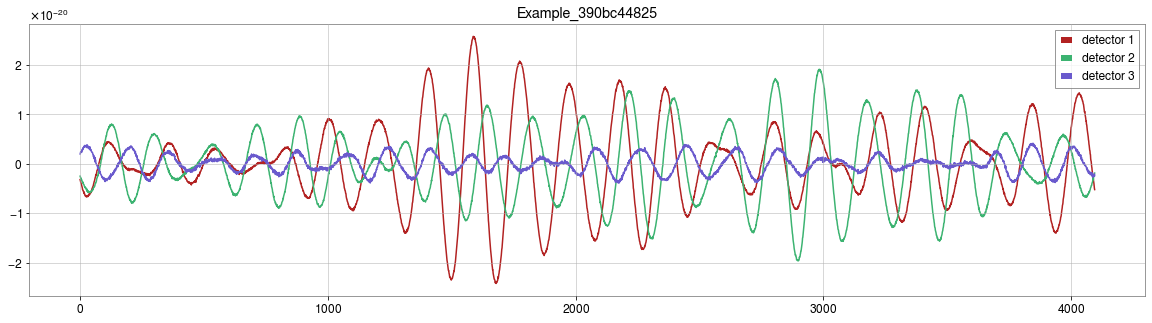

In [112]:
plt.figure(figsize=(20,5))

plt.plot(example_df_positive[0,:], c="firebrick", label="detector 1")
plt.plot(example_df_positive[1,:], c="mediumseagreen", label="detector 2")
plt.plot(example_df_positive[2,:], c="slateblue", label="detector 3")
plt.title(f'Example_{example_id_positive}');
plt.legend();

(0.0, 2.0)

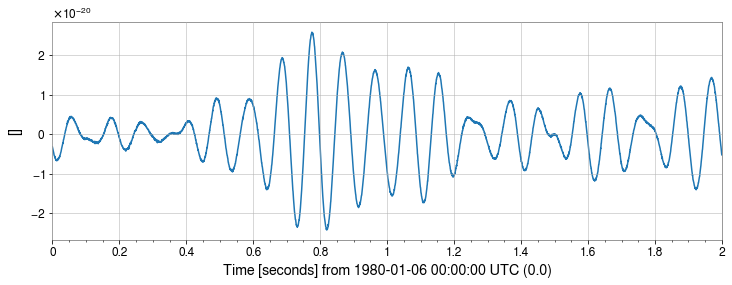

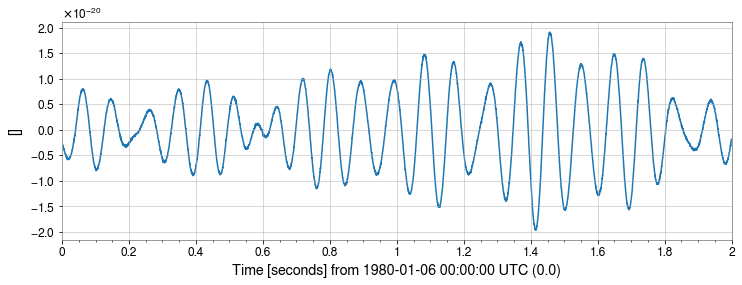

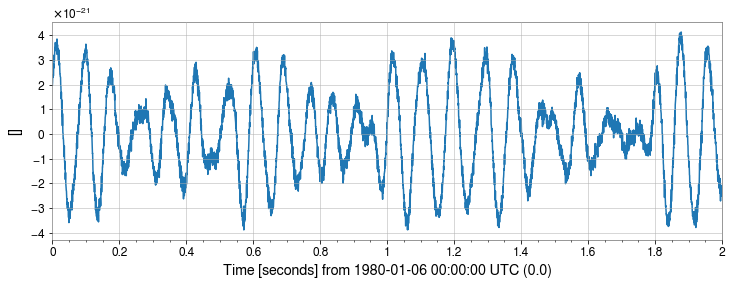

In [113]:
t0 = 1126259462.4 
# -- Read strain data
strain_detector_1 = TimeSeries(example_df_positive[0,:],  dt=2**-11)
strain_detector_2 = TimeSeries(example_df_positive[1,:],  dt=2**-11)
strain_detector_3 = TimeSeries(example_df_positive[2,:],  dt=2**-11)
#center = int(t0)
#strain = strain.crop(center-16, center+16)
fig1 = strain_detector_1.plot()
plt.xlim(0,2)
fig2 = strain_detector_2.plot()
plt.xlim(0,2)
fig3 = strain_detector_3.plot()
plt.xlim(0,2)

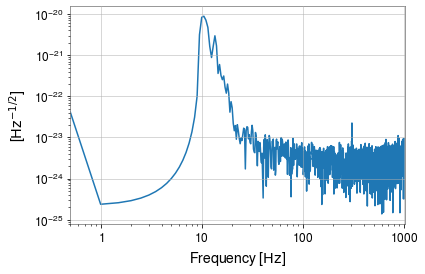

In [114]:
# -- Plot ASD
fig1_asd = strain_detector_1.asd(fftlength=2).plot()
#plt.xlim(-1,1)
#plt.ylim(1e-22, 1e-21)

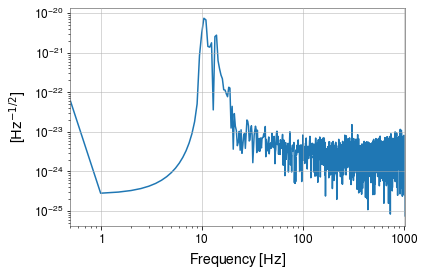

In [115]:
# -- Plot ASD
fig2_asd = strain_detector_2.asd(fftlength=2).plot()
#plt.xlim(0.1,10)
#plt.ylim(1e-22, 1e-21)

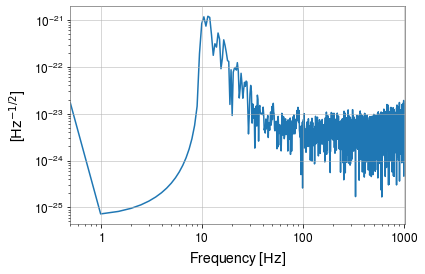

In [116]:
# -- Plot ASD
fig3_asd = strain_detector_3.asd(fftlength=2).plot()
#plt.xlim(0.1,10)
#plt.ylim(1e-22, 1e-21)

(0.0, 2.0)

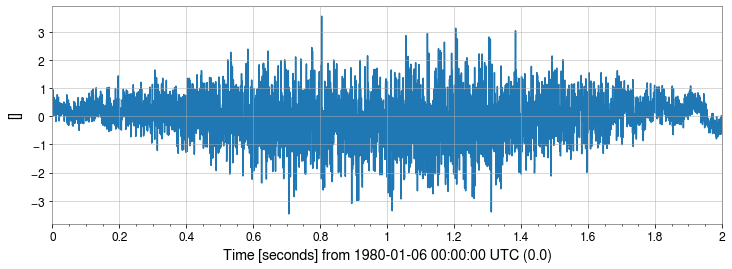

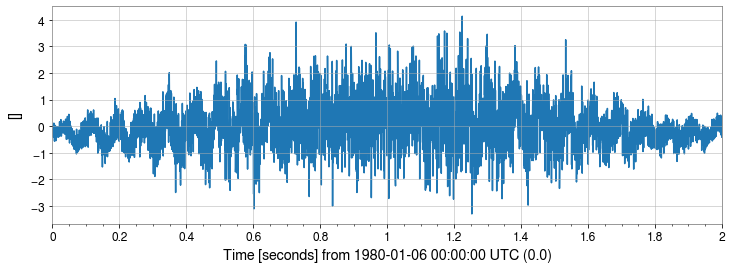

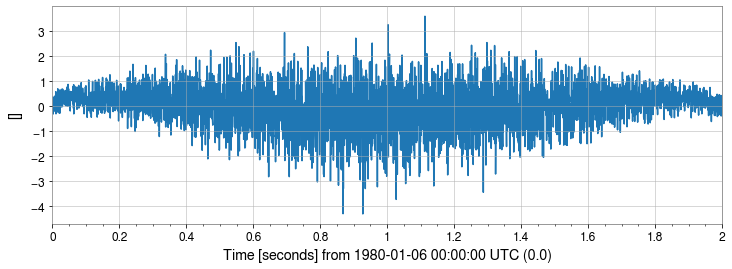

In [117]:
# -- Whiten and bandpass data
white_data_detector_1 = strain_detector_1.whiten()
#bp_data_1 = white_data_detector_1.bandpass(20, 50)
fig3 = white_data_detector_1.plot()
plt.xlim(0,2)

white_data_detector_2 = strain_detector_2.whiten()
#bp_data_2 = white_data_detector_2.bandpass(20, 50)
fig3 = white_data_detector_2.plot()
plt.xlim(0,2)

white_data_detector_3 = strain_detector_3.whiten()
#bp_data_3 = white_data_detector_3.bandpass(20, 50)
fig3 = white_data_detector_3.plot()
plt.xlim(0,2)

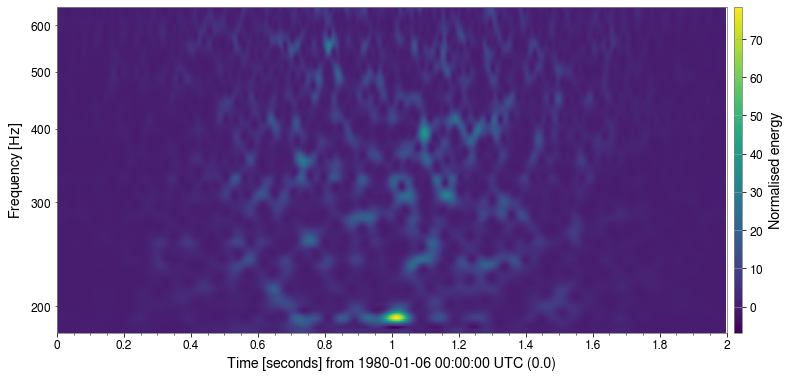

In [118]:
dt = 1  #-- Set width of q-transform plot, in seconds
hq = strain_detector_1.q_transform()
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalised energy")
ax.grid(False)
ax.set_yscale('log')